In [1]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img

In [2]:
import tensorflow as tf
import keras

In [3]:
import numpy as np
import argparse
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [5]:
model = tf.keras.models.load_model("/content/drive/MyDrive/Colab_Notebooks/client/model_trained.h5")
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Colab_Notebooks/client/haarcascade_frontalface_default.xml')

In [6]:
inputs = ['/content/drive/MyDrive/Colab_Notebooks/client/input_0.jpg',
          '/content/drive/MyDrive/Colab_Notebooks/client/input_1.jpg']

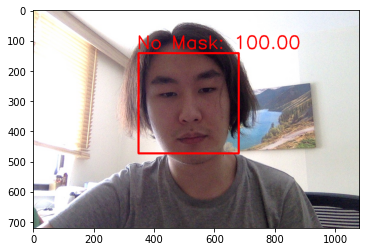

In [7]:
for i in range(len(inputs)):
    image_i = inputs[i]

    image = plt.imread(image_i)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.05, 10)

    for (x, y, w, h) in faces:

        face = image[y:y+h, x:x+w]
        face = cv2.resize(face, (224, 224))
        face = img_to_array(face)
        face = preprocess_input(face)
        face = np.expand_dims(face, axis=0)
        (mask, no_mask) = model.predict(face)[0]
        mask, no_mask = mask*100, no_mask*100
            
        if mask > no_mask:
            cv2.putText(image,
                        "Mask: " + str("%.2f" % round(mask, 3)),
                        (x-5,y-15), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 5)
            cv2.rectangle(image, (x, y), (x+w, y+h), (0,255,0), 5)
        else:
            cv2.putText(image,
                        "No Mask: " + str("%.2f" % round(no_mask, 3)),
                        (x-5,y-15), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0), 3)
            cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 5)

        plt.imshow(image)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        cv2.imwrite("/content/drive/MyDrive/Colab_Notebooks/client/output_" + str(i) + ".jpg", image)